Flight Price Prediction

In [46]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder,FunctionTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import category_encoders as ce

In [2]:
df = pd.read_csv("D:\downloads\Clean_Dataset\Clean_Dataset.csv")

In [3]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,duration_in_mins
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,130
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,140
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,130
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,135
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,140


In [4]:
df1 = df.copy()
df1.drop("Unnamed: 0",axis = 1, inplace = True)
df1.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,duration_in_mins
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,130
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,140
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,130
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,135
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,140


In [5]:
df1.drop('duration',axis = 1, inplace = True)
df1.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,days_left,price,duration_in_mins
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,1,5953,130
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,1,5953,140
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,1,5956,130
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,1,5955,135
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,1,5955,140


In [6]:
df1.drop('stops',axis = 1, inplace = True)
df1.drop('duration_in_mins',axis = 1, inplace = True)
df1.drop('flight',axis = 1, inplace = True)

df1.head()

,airline,source_city,departure_time,arrival_time,destination_city,class,days_left,price
0,SpiceJet,Delhi,Evening,Night,Mumbai,Economy,1,5953
1,SpiceJet,Delhi,Early_Morning,Morning,Mumbai,Economy,1,5953
2,AirAsia,Delhi,Early_Morning,Early_Morning,Mumbai,Economy,1,5956
3,Vistara,Delhi,Morning,Afternoon,Mumbai,Economy,1,5955
4,Vistara,Delhi,Morning,Morning,Mumbai,Economy,1,5955


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   airline           300153 non-null  object
 1   source_city       300153 non-null  object
 2   departure_time    300153 non-null  object
 3   arrival_time      300153 non-null  object
 4   destination_city  300153 non-null  object
 5   class             300153 non-null  object
 6   days_left         300153 non-null  int64 
 7   price             300153 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 18.3+ MB


In [8]:
df1.isnull().sum()

airline             0
source_city         0
departure_time      0
arrival_time        0
destination_city    0
class               0
days_left           0
price               0
dtype: int64

In [9]:
df1["airline"].value_counts()

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

In [10]:
df1.duplicated().sum()

np.int64(75640)

In [11]:
df1.drop_duplicates(inplace = True)

In [12]:
df1.duplicated().sum()

np.int64(0)

In [13]:
df1['departure_time'].value_counts()

departure_time
Morning          53022
Early_Morning    50297
Evening          46251
Night            37414
Afternoon        36290
Late_Night        1239
Name: count, dtype: int64

In [14]:
df1['destination_city'].value_counts()

destination_city
Delhi        43293
Mumbai       43152
Kolkata      37827
Bangalore    36172
Hyderabad    32972
Chennai      31097
Name: count, dtype: int64

In [15]:
df1['source_city'].value_counts()

source_city
Delhi        46505
Mumbai       43928
Kolkata      36713
Bangalore    35618
Hyderabad    31787
Chennai      29962
Name: count, dtype: int64

In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 224513 entries, 0 to 300152
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   airline           224513 non-null  object
 1   source_city       224513 non-null  object
 2   departure_time    224513 non-null  object
 3   arrival_time      224513 non-null  object
 4   destination_city  224513 non-null  object
 5   class             224513 non-null  object
 6   days_left         224513 non-null  int64 
 7   price             224513 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 15.4+ MB


EDA

<Axes: xlabel='price', ylabel='Density'>

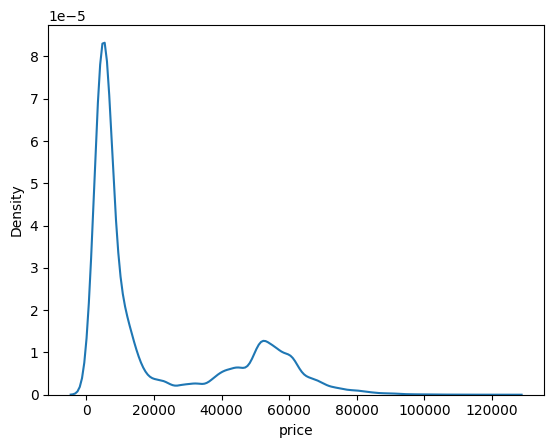

In [17]:
sns.kdeplot(data = df1, x = 'price')

In [18]:
df1['price'] = np.log1p(df1['price'])

<Axes: xlabel='price', ylabel='Density'>

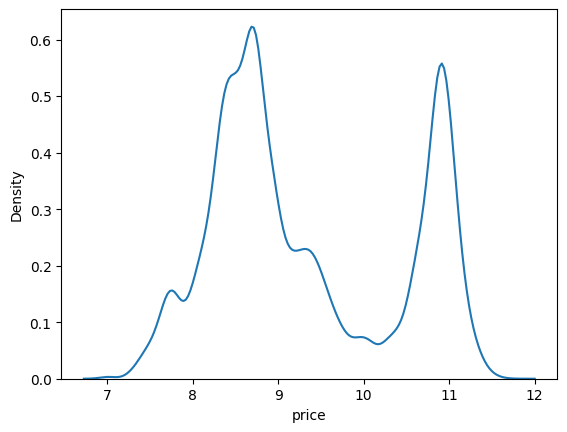

In [19]:
sns.kdeplot(data = df1, x = 'price')

In [20]:
df1[['days_left','price']].corr()

,days_left,price
days_left,1.000000,-0.201547
price,-0.201547,1.000000


Indigo is the most popular airline

In [21]:
df_grouped2 = df1.groupby(['airline','class'], as_index = False).count()
df_grouped2['class'].value_counts()

class
Economy     6
Business    2
Name: count, dtype: int64

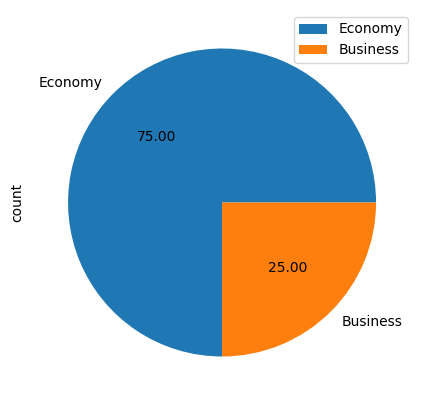

In [22]:
plt.figure(figsize = (8,5))
df_grouped2['class'].value_counts().plot(kind = 'pie', autopct = "%.2f")
plt.legend(['Economy','Business'])
plt.show()

How does the ticket price vary between Economy and Business class?

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7288\412344583.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df1, x="class", y="price",palette = "Set1")


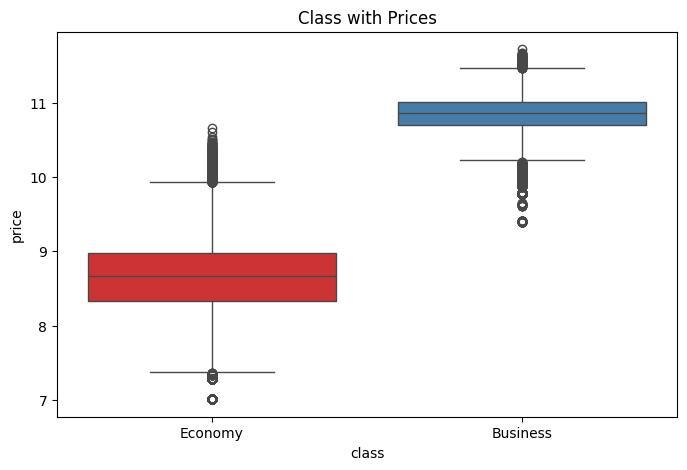

In [23]:
plt.figure(figsize = (8,5))
sns.boxplot(data=df1, x="class", y="price",palette = "Set1")
plt.title("Class with Prices")
plt.show()

variation in ticket price for different airlines.

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7288\122286678.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df1, x="airline", y="price",palette = "Set1")


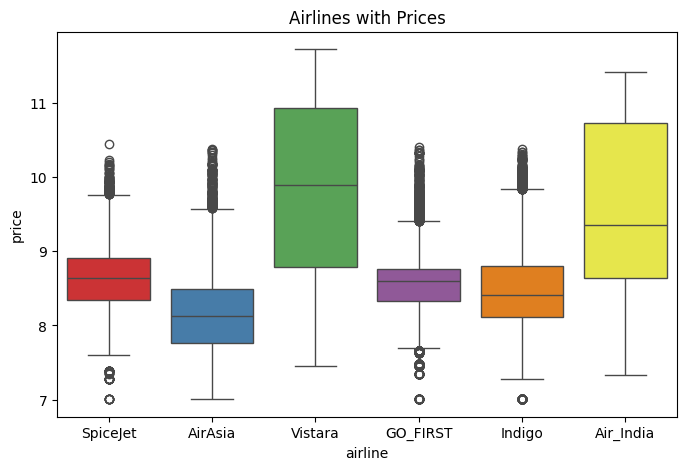

In [24]:
plt.figure(figsize = (8,5))
sns.boxplot(data=df1, x="airline", y="price",palette = "Set1")
plt.title("Airlines with Prices")
plt.show()

Vistara and Air India is the most expensive price when compared to other airline companies

change in price with change in source city and Destination city

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7288\1767023275.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df1, x="source_city", y="price",palette = 'Set1')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7288\1767023275.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df1, x="destination_city", y="price",palette = 'Set1')


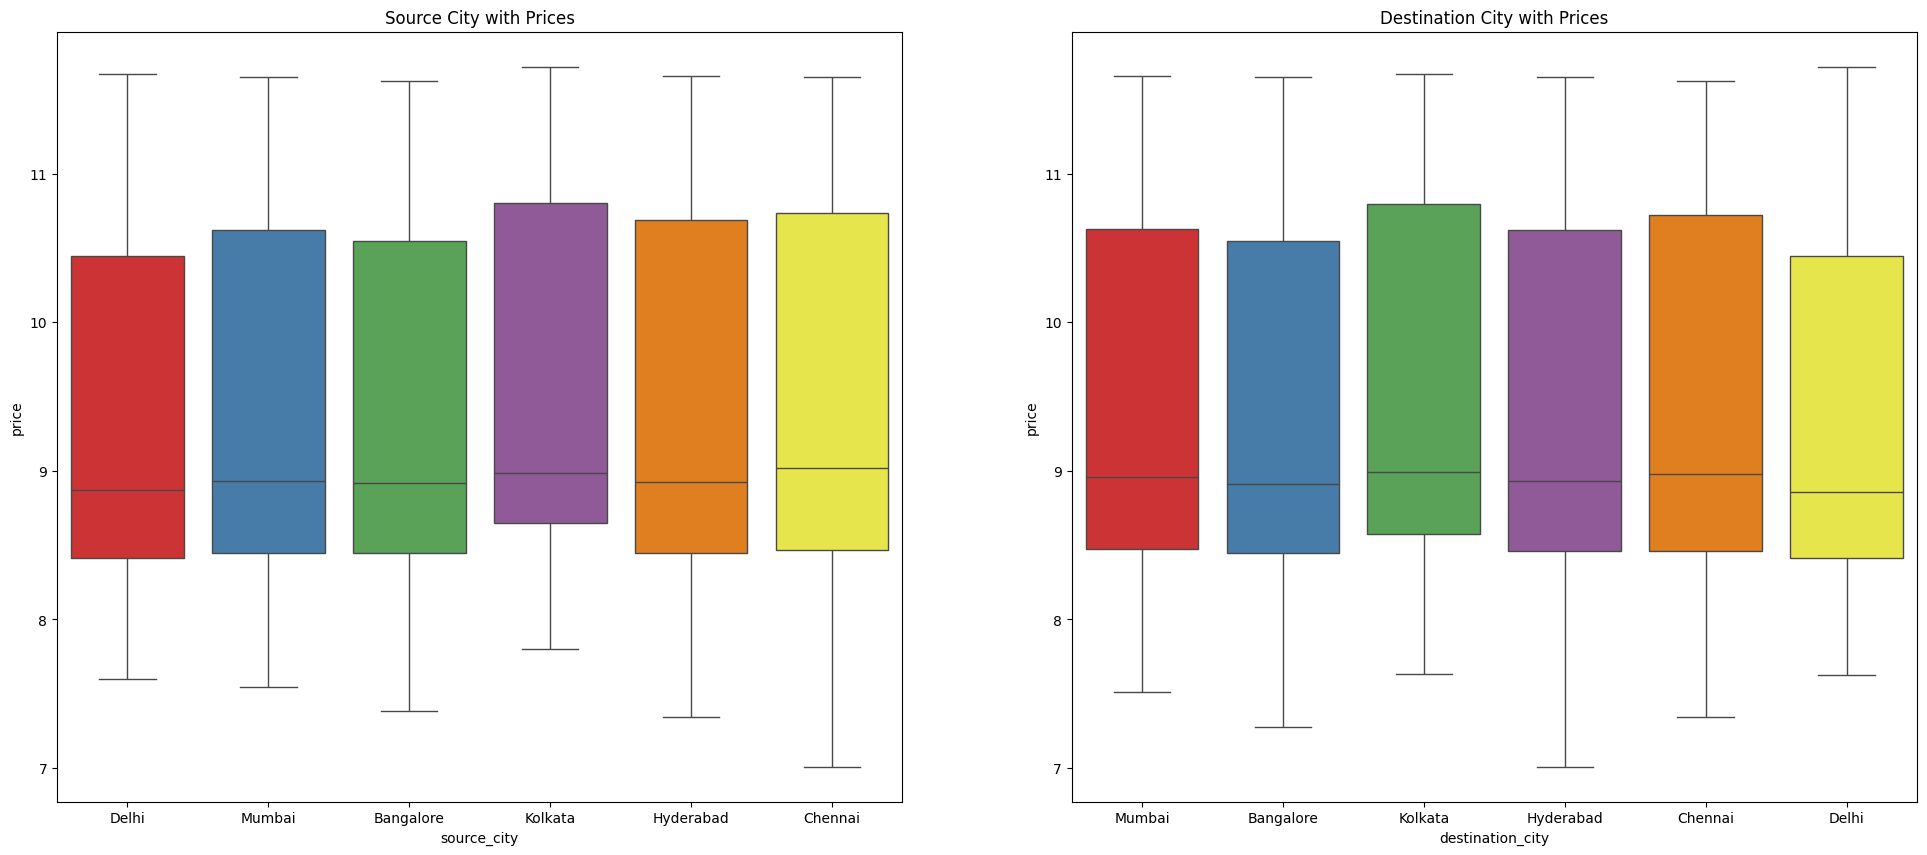

In [25]:
plt.figure(figsize = (24,10))
plt.subplot(1,2,1)
sns.boxplot(data=df1, x="source_city", y="price",palette = 'Set1')
plt.title("Source City with Prices")
plt.subplot(1,2,2)
sns.boxplot(data=df1, x="destination_city", y="price",palette = 'Set1')
plt.title("Destination City with Prices")
plt.show()

change in ticket price based on the departure time

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7288\1308021548.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df1, x="departure_time", y="price",palette = 'Set1')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7288\1308021548.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df1, x="arrival_time", y="price",palette = 'Set1')


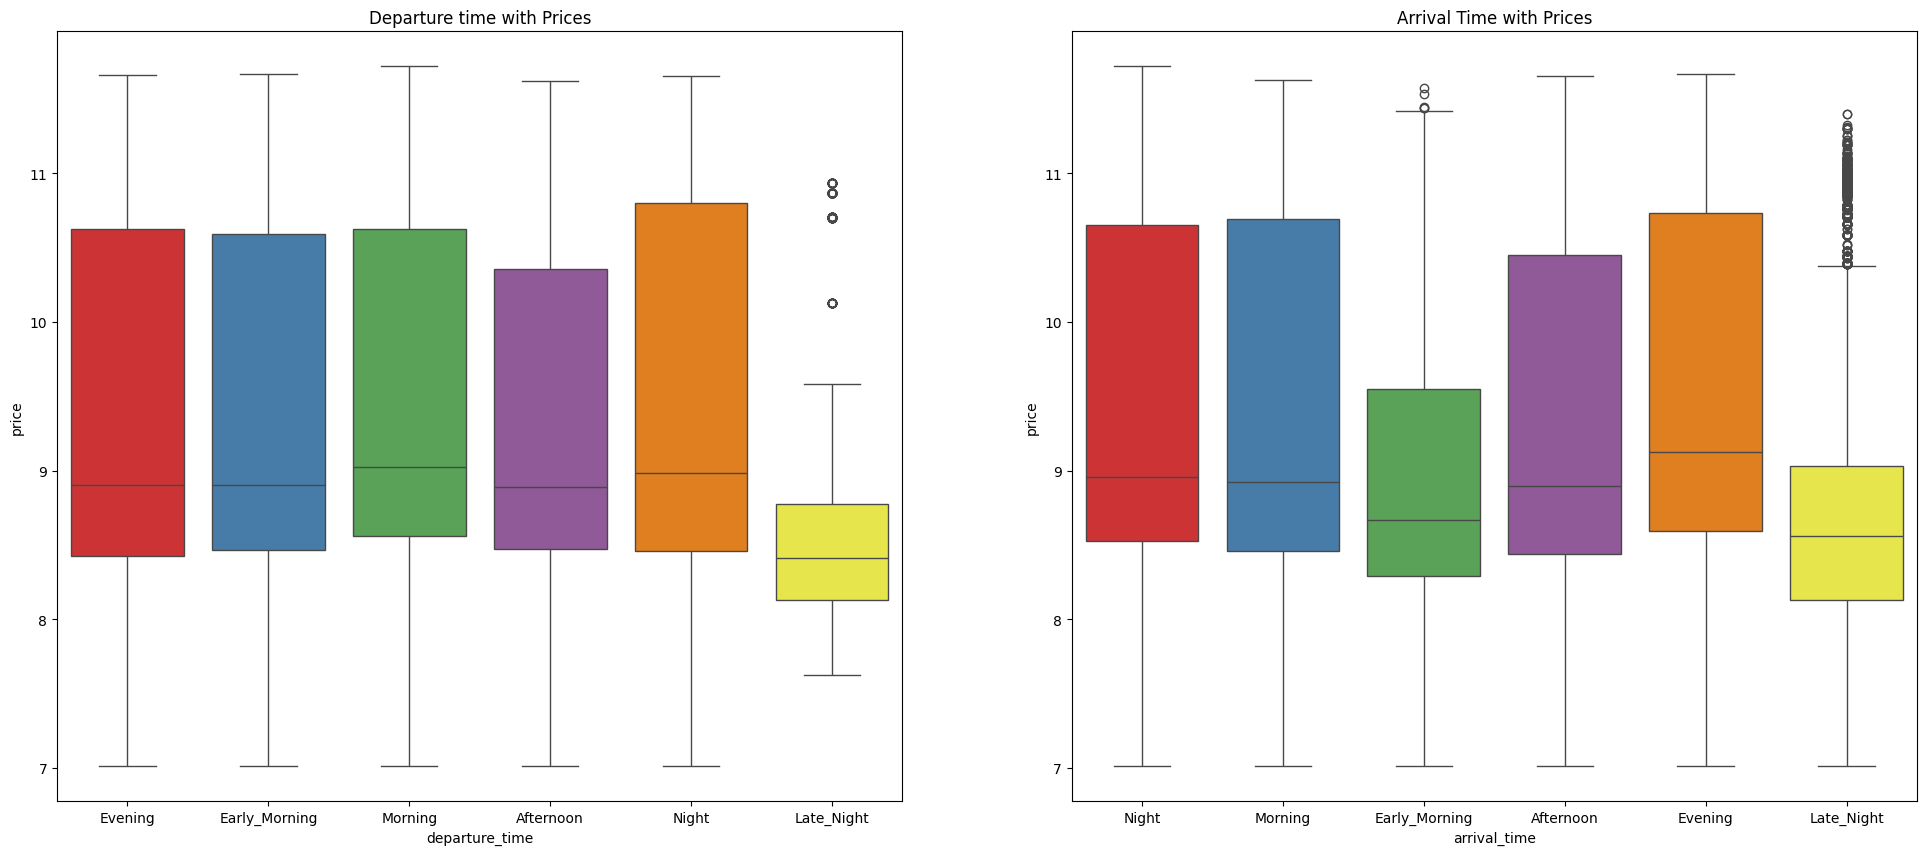

In [26]:
plt.figure(figsize = (24,10))
plt.subplot(1,2,1)
sns.boxplot(data=df1, x="departure_time", y="price",palette = 'Set1')
plt.title("Departure time with Prices")
plt.subplot(1,2,2)
sns.boxplot(data=df1, x="arrival_time", y="price",palette = 'Set1')
plt.title("Arrival Time with Prices")
plt.show()

How is the price affected on the days left for departure?

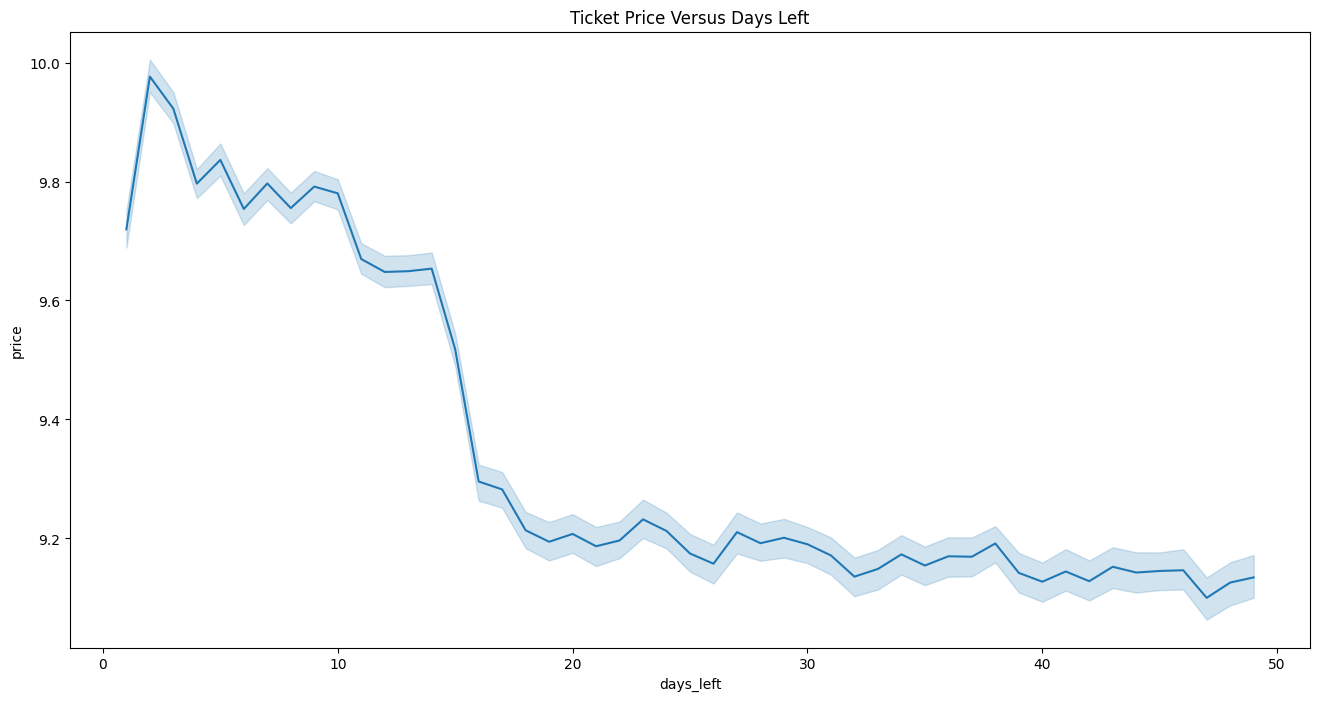

In [27]:
plt.figure(figsize = (16, 8))
sns.lineplot(data = df1, x = 'days_left', y= 'price')
plt.title('Ticket Price Versus Days Left')
plt.show()

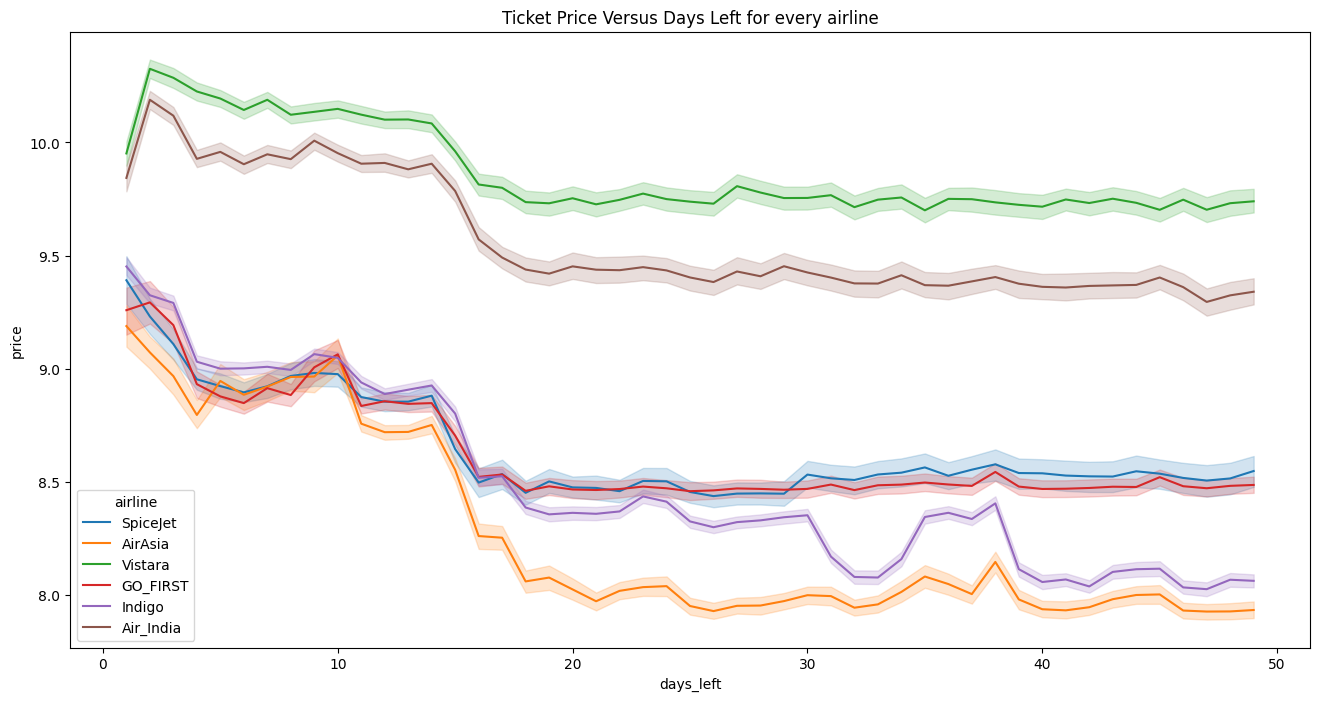

In [28]:
plt.figure(figsize = (16, 8))
sns.lineplot(data = df1, x = 'days_left', y= 'price', hue = 'airline')
plt.title('Ticket Price Versus Days Left for every airline')
plt.show()

Average price of different airlines from source city to destination city

In [29]:
df1.groupby(['airline','source_city','destination_city'], as_index = False)['price'].mean().head()

,airline,source_city,destination_city,price
0,AirAsia,Bangalore,Chennai,7.582930
1,AirAsia,Bangalore,Delhi,8.462589
2,AirAsia,Bangalore,Hyderabad,7.845356
3,AirAsia,Bangalore,Kolkata,8.333866
4,AirAsia,Bangalore,Mumbai,8.023648


In [30]:
X = df1.drop(columns =['price'])
y = df1['price']

In [31]:
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 1)

In [32]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 224513 entries, 0 to 300152
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           224513 non-null  object 
 1   source_city       224513 non-null  object 
 2   departure_time    224513 non-null  object 
 3   arrival_time      224513 non-null  object 
 4   destination_city  224513 non-null  object 
 5   class             224513 non-null  object 
 6   days_left         224513 non-null  int64  
 7   price             224513 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 15.4+ MB


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7288\2164915367.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['price'])


<Axes: xlabel='price', ylabel='Density'>

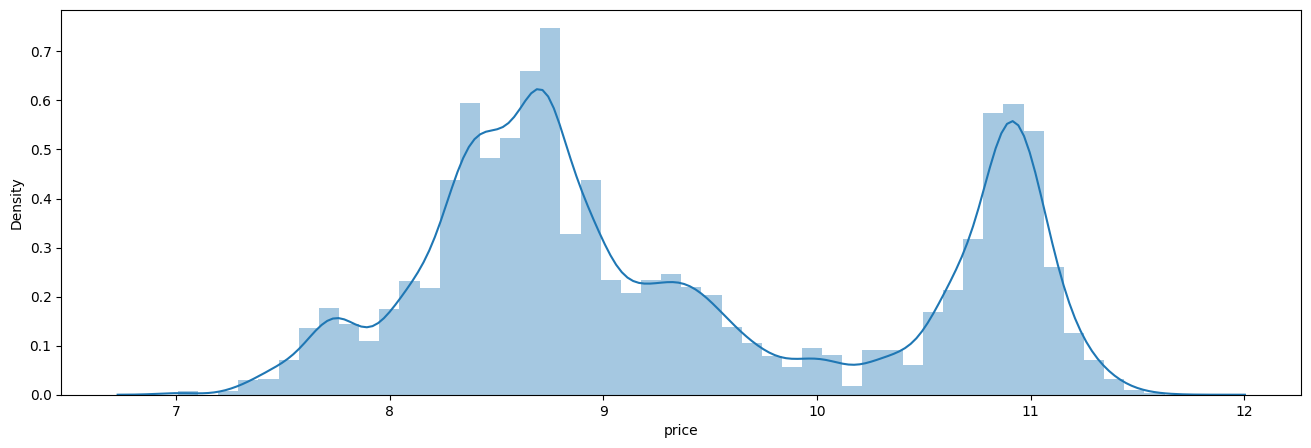

In [33]:
plt.figure(figsize=(16,5))
sns.distplot(df1['price'])

In [34]:
categories = ['airline','source_city','departure_time',"arrival_time",'destination_city','class']

In [35]:
from sklearn.compose import ColumnTransformer


transformer = ColumnTransformer(transformers= [
    #('Scalar',StandardScaler(),['duration_in_mins']),
    ('categories_transform',OneHotEncoder(handle_unknown='ignore',sparse_output=False),categories) # onehot encoding categorical features
],remainder = 'passthrough')

In [48]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline(steps = [
    ('transformer',transformer),
    ('model', LinearRegression())
]).set_output(transform="pandas")

In [49]:
pipeline.fit(X_train, y_train)

c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('categories_transform',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['airline', 'source_city',
                                                   'departure_time',
                                                   'arrival_time',
                                                   'destination_city',
                                                   'class'])])),
                ('model', LinearRegression())])

In [50]:
y_pred = pipeline.predict(X_test)

In [51]:
mean_squared_error(y_test, y_pred)

0.14219117128214315

In [52]:
r2 = r2_score(y_test, y_pred)
print(f'R² Score: {r2:.5f}')

R² Score: 0.88300


In [53]:
train_r2 = pipeline.score(X_train, y_train)
print(f"Train R² Score: {train_r2:.5f}")

Train R² Score: 0.88379


In [42]:
from sklearn.model_selection import cross_val_score

cv_r2 = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='r2')
print(f"Cross-Validation R² Scores: {cv_r2}")
print(f"Average R² Score: {cv_r2.mean():.5f}")

KeyboardInterrupt: 

In [54]:
import pickle
pickle.dump(pipeline,open('model.pkl','wb'))

In [55]:
ans = pickle.load(open('model.pkl','rb'))

In [ ]:
df1.head()

,airline,source_city,departure_time,arrival_time,destination_city,class,days_left,price
0,SpiceJet,Delhi,Evening,Night,Mumbai,Economy,1,8.691819
1,SpiceJet,Delhi,Early_Morning,Morning,Mumbai,Economy,1,8.691819
2,AirAsia,Delhi,Early_Morning,Early_Morning,Mumbai,Economy,1,8.692322
3,Vistara,Delhi,Morning,Afternoon,Mumbai,Economy,1,8.692154
4,Vistara,Delhi,Morning,Morning,Mumbai,Economy,1,8.692154


In [ ]:
test_input = pd.DataFrame([{
    "airline": 'Indigo',
    "source_city":"Delhi",
    "departure_time":"Early_Morning",
    "arrival_time":"Morning",
    "destination_city":"Bangalore",
    "class":"Economy",
    "days_left":60,
}])

In [ ]:
np.expm1(ans.predict(test_input))

array([4400.5724547])